In [1]:
import numpy as np
import gym
import gym_crumb
from math import radians


In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [3]:
env = gym.make("crumb-synthetic-v0")

In [4]:
from qlearning import QLearningAgent
aim = env.aim

agent = QLearningAgent(alpha=0.25,epsilon=0.8,discount=0.99)

In [5]:
env.step([0,radians(-180)])

((3.6739403974420594e-16, 0.0, 0.0, 0.0), 1059.0, True)

In [5]:
sign = lambda a: 1 if a>0 else -1 if (a<0) else 0
def signs(vec_a):
    signs = np.zeros(len(vec_a))
    for i in range(len(vec_a)):
        signs[i] = sign(vec_a[i])
    return signs
        
        
def module(vec_a):
    return (vec_a**2).sum()**(0.5)

def angle(vec_a, vec_b):
    return np.arccos((vec_a*vec_b).sum(axis = 1)/(module(vec_a) * module(vec_b)))
def norm(vec_a):
    norm = np.zeros_like(vec_a)
    for i in range(len(vec_a)):
        norm[i][0] = -vec_a[i][1]
        norm[i][1] = vec_a[i][0]
    return norm
        

In [6]:
def state1(state, aim = env.aim):
    aim1 = aim
    #Угол к горизонту
    hor = np.zeros(3)
    hor[0] = state[0]
    for i in range(1,3):
        hor[i] = state[i] + hor[i-1]
        
        
    #Joints pose
    joint_x = np.zeros(4) #*a
    joint_y = np.zeros(4)
    for i in range(3):
        joint_x[i+1] = joint_x[i] + np.sin(hor[i])
        joint_y[i+1] = joint_y[i] + np.cos(hor[i])
        
    joint = np.array([joint_x,joint_y]).T
    
    #vectors
    vec1 = np.zeros((3,2))
    vec2 = np.zeros((3,2))
    vec3 = np.zeros((3,2))
    
    for i in range(3):
        vec1[i] = joint[3] - joint[i]
        vec2[i] = aim1 - joint[i]
    
    state1 = signs(angle(norm(vec1), vec2) - np.full(3, radians(90))) #вестор из 1, -1, 0
    return tuple(state1)
     

In [7]:
env.aim

array([0., 3.])

In [6]:
def play_and_train(env,agent,t_max=10**3):

    total_reward = 0.0
    s = env.reset()
    r = 0
    #env.step((3, radians(0)))
    for t in range(t_max):
        action = agent.getAction(s)#<get agent to pick action given state s>
        a = (action[0], action[1] + s[action[0]]) 
        next_s,r, done = env.step(a) 
        agent.update(s, action, next_s, r)#<train (update) agent for state s>
        
        s = next_s
        total_reward +=r
        if done:
            agent.epsilon = agent.epsilon * 0.8
            print ('yyes')
            break
    return total_reward
    
        
    

aim = (0, 3)

mean reward -8118.96


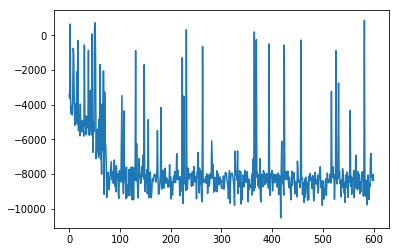

yyes
yyes


KeyboardInterrupt: 

In [7]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))    
    if i % 100 == 0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
        

aim = (2, 1)

In [25]:
env.aim = np.array((0, 3))

mean reward -32.0


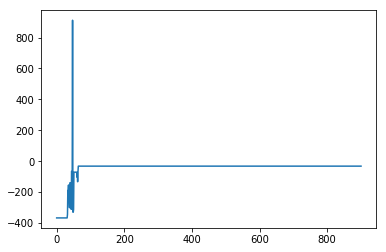

In [26]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))    
    if i % 100 == 0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()

In [27]:
agent.epsilon

1e-323

In [8]:
def play(env, agent, t_max=10**4):
    total_reward = 0.0
    s = env.reset()
    r = 0
    #env.step((3, radians(0)))
    for t in range(t_max):
        a = agent.getPolicy(tuple(s))#<get agent to pick action given state s>
        
        next_s,r, done = env.step(a)
        print (r)
        
        #agent.update(tuple(s), a, tuple(next_s), r)#<train (update) agent for state s>
        
        s = next_s
        total_reward +=r
        if done:break
    return total_reward

In [11]:
agent.Actions

((0, 0),
 (0, 0.07853981633974483),
 (0, -0.07853981633974483),
 (0, 0.15707963267948966),
 (0, -0.15707963267948966),
 (0, 0.23561944901923448),
 (0, -0.23561944901923448),
 (0, 0.3141592653589793),
 (0, -0.3141592653589793),
 (0, 0.39269908169872414),
 (0, -0.39269908169872414),
 (0, 0.47123889803846897),
 (0, -0.47123889803846897),
 (0, 0.5497787143782138),
 (0, -0.5497787143782138),
 (0, 0.6283185307179586),
 (0, -0.6283185307179586),
 (0, 0.7068583470577035),
 (0, -0.7068583470577035),
 (0, 0.7853981633974483),
 (0, -0.7853981633974483),
 (0, 0.8639379797371931),
 (0, -0.8639379797371931),
 (0, 0.9424777960769379),
 (0, -0.9424777960769379),
 (0, 1.0210176124166828),
 (0, -1.0210176124166828),
 (0, 1.0995574287564276),
 (0, -1.0995574287564276),
 (0, 1.1780972450961724),
 (0, -1.1780972450961724),
 (0, 1.2566370614359172),
 (0, -1.2566370614359172),
 (0, 1.335176877775662),
 (0, -1.335176877775662),
 (0, 1.413716694115407),
 (0, -1.413716694115407),
 (0, 1.4922565104551517),
 (0, 